<a href="https://colab.research.google.com/github/hiroto-noguchi/book_2023/blob/main/chapter_1/1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 必要なライブラリーをインポートする。
import requests
from bs4 import BeautifulSoup
import time
from collections import Counter
# 変数を初期設定する。
text = ''

base = 'https://en.wikipedia.org/wiki/'
items = ['Web_scraping', 'Robots.txt',
'Natural_language_processing']
''' 各項目についてウェブページを取得し、テキストを抽出
する。'''
for item in items:
  webpage = requests.get(base + item)
  soup = BeautifulSoup(
  webpage.content, 'html.parser')
  p_tags = soup.find_all('p')
  ''' 各段落からテキストを抽出し、改行をスペースに置
  き換える。'''
  for p_tag in p_tags:
    text = text + p_tag.get_text()\
    .replace('\n', ' ')
  ''' ウェブサイトへの負荷を減らすために1 秒待機す
  る。'''
  time.sleep(1)
# 単語の出現頻度をカウントする。
freq = Counter(text.lower().split())
# 出現頻度を表示する。
freq

Counter({'web': 68,
         'scraping,': 4,
         'harvesting,': 2,
         'or': 39,
         'data': 27,
         'extraction': 2,
         'is': 65,
         'scraping': 23,
         'used': 17,
         'for': 53,
         'extracting': 3,
         'from': 32,
         'websites.[1]': 1,
         'software': 9,
         'may': 11,
         'directly': 2,
         'access': 9,
         'the': 307,
         'world': 3,
         'wide': 3,
         'using': 12,
         'hypertext': 1,
         'transfer': 1,
         'protocol': 5,
         'a': 141,
         'browser.': 1,
         'while': 5,
         'can': 32,
         'be': 40,
         'done': 1,
         'manually': 3,
         'by': 33,
         'user,': 1,
         'term': 2,
         'typically': 4,
         'refers': 2,
         'to': 140,
         'automated': 3,
         'processes': 1,
         'implemented': 1,
         'bot': 1,
         'crawler.': 2,
         'it': 26,
         'form': 4,
         'of': 178,
  

In [2]:
# Google Drive をマウントする。
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Pandas をインポートする。
import pandas as pd
# 辞書データをdataframe に変換する。
df = pd.DataFrame.from_dict\
(freq, orient='index', columns=[
'frequency']).rename_axis('word')

In [4]:
# 20 回以上繰り返される語のみを抽出する。
df[df['frequency'] >= 20]

,frequency
word,
web,68
or,39
data,27
is,65
scraping,23
for,53
from,32
the,307
a,141


In [5]:
'''dataframe をCSV ファイルでGoogle Drive に保存す
る。'''
df.to_csv(
'/content/drive/MyDrive/frequency.csv')

In [6]:
'''Google Drive のCSV ファイルをdataframe として読
み込む。'''
df_1 = pd.read_csv(
'/content/drive/MyDrive/frequency.csv')
df_1

,word,frequency
0,web,68
1,"scraping,",4
2,"harvesting,",2
3,or,39
4,data,27
...,...,...
1889,inherent,1
1890,multimodal,1
1891,(although,1
1892,rarely,1


<Axes: xlabel='word'>

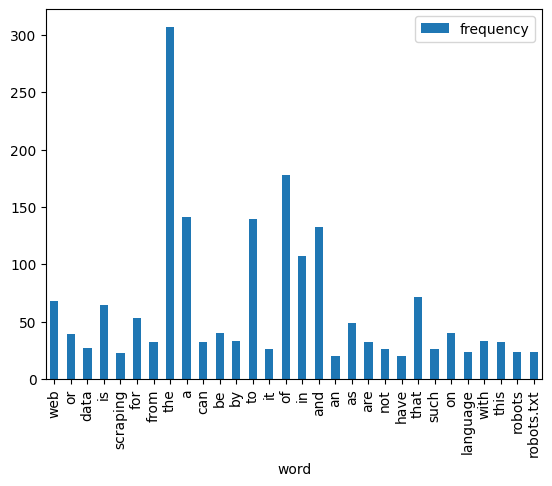

In [7]:
'''20 回以上繰り返される語のみを抽出し、棒グラフにす
る。'''
df[df['frequency'] >= 20].plot(kind='bar')

In [8]:
# 20 回以上繰り返される語のみを抽出し、降順に並べる。
df[df['frequency'] >= 20].sort_values(
'frequency', ascending=False)

,frequency
word,
the,307
of,178
a,141
to,140
and,133
in,107
that,72
web,68
is,65


<Axes: xlabel='word'>

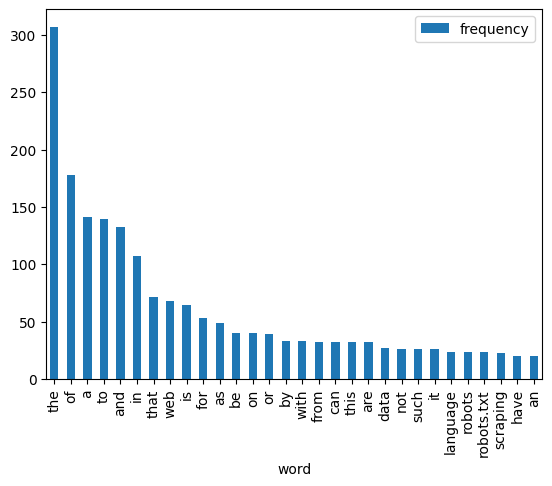

In [9]:
'''20 回以上繰り返される語のみを抽出し、降順に並べて、
棒グラフにする。'''
df[df['frequency'] >= 20].sort_values(
'frequency', ascending=False)\
.plot(kind='bar')

In [10]:
print(3*1**2+2*1+1)
print(3*2**2+2*2+1)
print(3*3**2+2*3+1)

6
17
34


In [11]:
# 数式を関数化する。
def f(x):
  return 3*x**2+2*x+1

In [12]:
# 関数に1 から3 までの値を代入する。
for i in [1, 2, 3]:
  print(f(i))

6
17
34


In [13]:
''' スクレイピングから可視化までの流れを関数として定義
する。
item にはリストでURL の末尾を、n には整数で単語の出現
回数の閾値を受け取る。'''
def visualize(items, n):
  # 必要なライブラリーをインポートする。
  import requests
  from bs4 import BeautifulSoup
  import time
  from collections import Counter
  import pandas as pd
  # 変数を初期化する。
  text = ''
  base = 'https://en.wikipedia.org/wiki/'
  # 各アイテムに対してスクレイピングをおこなう。
  for item in items:
    # Wikipedia のページを取得する。
    webpage = requests.get(base + item)
    # BeautifulSoup で解析する
    soup = BeautifulSoup(
    webpage.content, 'html.parser')
    # <p> タグをすべて取得する。
    p_tags = soup.find_all('p')
    ''' 各<p> タグのテキストを取得し、改行をスペース
    に置き換えてtext に追加する。'''
    for p_tag in p_tags:
      text = text + p_tag.get_text()\
      .replace('\n', ' ')
      ''' ウェブサイトへの負荷軽減のため、1 秒待機す
      る。'''
    time.sleep(1)
  # 単語の出現回数をカウントする。
  freq = Counter(text.lower().split())
  ''' データフレームに変換し、単語をインデックスに設
  定する。'''
  df = pd.DataFrame.from_dict(
  freq, orient = 'index', columns = [
  'frequency']).rename_axis('word')
  ''' 閾値以上の出現回数を持つ単語を抽出し、降順に
  ソートして棒グラフで表示する。'''
  df[df['frequency'] >= n].sort_values(
  'frequency', ascending = False)\
  .plot(kind = 'bar')

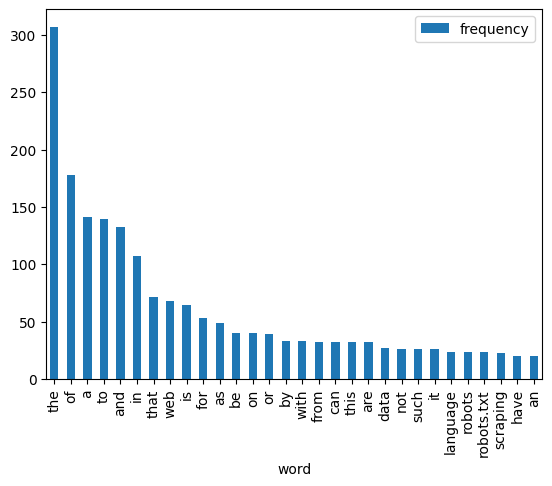

In [14]:
''''Web_scraping', 'Robots.txt', 'Natural_language_
processing' の記事で20 回以上出てくる単語を棒グラフ
で可視化する。'''
visualize(['Web_scraping', 'Robots.txt',
'Natural_language_processing'], 20)

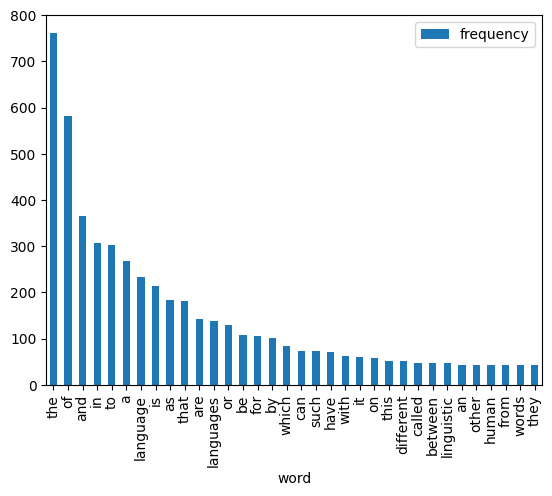

In [15]:
''''Language', 'English' の記事で40 回以上出てくる
単語を棒グラフで可視化する。'''
visualize(['Language', 'English'], 40)